The goal of the notebook is to study under which conditions resonance terms emerge due to symmetry breaking.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    diff,
    nsolve,
    O,
    I
)
from sympy.core.numbers import NegativeOne, One, Zero
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
#from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
    HamSQuad6D,
    HamSext6D
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D
from acchamiltoniansandmatrices.Utils.Plotting import multi_countour_plot

from acchamiltoniansandmatrices.Factorization.Factorization import truncate
from acchamiltoniansandmatrices.Tracking.LieMapTracking import AssignHam, RingHam

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

# Lattice Symmetry Breaking (generic)

**M. Arlandoo, J. Frank, T. Mertens**

# Overview

- general
- Symmetry
- Symmetry Breaking

# Generic Symmetry Breaking in an Accelerator Lattice

# General 

We  start by considering the following lattice:
$$A-B-C$$
where A,B and C are generic Hamiltonian operators for lattice elements, **or effective Hamiltonian operators for sublattices**, and we consider the beam coming from the left (this important for the ordering of the operators).

The corresponding Lie map is given by:
$$e^{A(q^0_i,p^0_i)}e^{B(q^1_i,p^1_i)}e^{C(q^2_i,p^2_i)}$$
and after the correct coordinate transformations this becomes:
$$e^{C(q^0_i,p^0_i)}e^{B(q^0_i,p^0_i)}e^{A(q^0_i,p^0_i)}$$

The operators A,B and C in the exponents need to be combined using the BCH formula. Doing this order by order, where with order we mean the number of iterative Poisson brackets and not the order of the resulting polynomial in the independent coordinates, we get:
$$H_0 = A +B + C$$

For the higher orders we go step by step. Let us start by first having a look at $H_1$ for the first three elements.
$$H_1 = A + B + C + \frac{\lbrace \frac{\lbrace A,B \rbrace }{2} + A + B,C \rbrace }{2} + \frac{\lbrace A,B \rbrace }{2}$$


# Symmetry

One can immediately see the effect of the BCH formula, making things very complicated very quickly. 

An interesting question to ask is what happens if $C=A$.

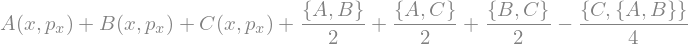

In [7]:
# without symmetry
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True)

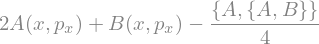

In [8]:
# with symmetry
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True).subs(C,A)

**The terms with a single Poisson bracket have been canceled out!**

Let us now break the symmetry lightly and assume that $C = A + \delta A$.

# Explicit Symmetry Breaking

In [9]:
da = Function("\delta A", commutative=False)(x,px)
da

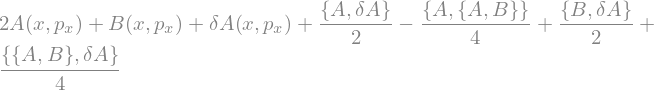

In [10]:
Aop.BCH(Bop,2).BCH(Cop,2).ham.expand(commutator=True).subs(C,A+da).expand(commutator=True)

Slightly breaking the symmetry between the elements $A$ and $C$ immediately introduces new terms
in the Hamiltonian:
$$2 A{\left(x,p_{x} \right)} + B{\left(x,p_{x} \right)} + \delta A{\left(x,p_{x} \right)} + 
\underbrace{\color{blue}{\frac{\lbrace A,\delta A \rbrace }{2}}}_{\color{red}{\text{SB1}}} 
- \frac{\lbrace A,\lbrace A,B \rbrace  \rbrace }{4} 
+ \underbrace{\color{blue}{\frac{\lbrace B,\delta A \rbrace }{2}}}_{\color{red}{\text{SB2}}}  + 
\underbrace{\color{gray}{\frac{\lbrace \lbrace A,B \rbrace ,\delta A \rbrace }{4}}}_{\color{red}{\text{SB3}}} $$
where SB stands for Symmetry Breaking. Note that these terms are directly proportional to the amount of symmetry breaking. 

# Resonance vs non-resonance contributions

In [11]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)
Dop = LieOperator(D,x,px)
Eop = LieOperator(E,x,px)

In [12]:
# Define constant number symbols in sympy - otherwise they are considered variables
LQF   = SymbolTrick("L_{QF}")
LQD   = SymbolTrick("L_{QD}")
LD    = SymbolTrick("L_D")
LD2   = SymbolTrick("L_{D2}")
KQF   = SymbolTrick("K_{QF}")
KQD   = SymbolTrick("K_{QD}")

rep = list(zip(
    [
        LD,
        LD2,
        LQF,
        LQD,
        KQF,
        KQD,
        delta
    ],
    [
        3.5805,
        3.5805,
        0.342,
        0.668,
        0.49,
        -0.4999,
        1.5e-3
    ]
)
          )


# Lie Map tracking

## Constructing effective Hamiltonians

In [24]:
def AssignHam(element, order=3, length=1, k=1,flag=1):
    '''
    Element:
    1 = drift space
    2 = quadrupole
    25 = skew quadrupole
    3 = sextupole
    35 = skew sextupole - tbp
    '''
    order = order +1
    betagamma_rep = list(
        zip(
            [
                beta0*gamma0,
                beta0
            ],
            [
                oo,
                1
            ]
        )
    )
    series_rep = list(
        zip(
            [
                px,
                py,
                delta
            ],
            [
                eps*px,
                eps*py,
                eps*delta
            ]
        )
    )
    coord_rep = list(zip([x,y],[eps*x,eps*y]))

    thin_rep = list(zip([px,py,delta],[0,0,0]))
    if element == 1:
        # drift hamiltonian
        H = HamDrift6D(beta0, gamma0, length,x,px,y,py,delta)
        H = H.subs(betagamma_rep)
        H = H.subs(series_rep).series(eps,n=order).removeO()
        H = simplify(H.subs(eps,One()) - H.subs(eps,Zero()))
#         H = drift(order, length)
        
    elif element == 2:
        # quadrupole - thin is set by flag
        H = NegativeOne() * Rational(1,2) * HamQuad6D(beta0,gamma0,length,x,px,y,py,delta,k)
        H = H.subs(betagamma_rep)
        H = H.subs(series_rep).series(eps,n=order).removeO()
        H = H.subs(coord_rep)
        H = simplify(H.subs(eps,One()) - H.subs(eps,Zero()))
        
        if flag:
            H = H.subs(thin_rep)
        
#         H = quad(order, length, strength, flag)
    elif element == 25:
        H = NegativeOne() * Rational(1,2) * HamSQuad6D(beta0,gamma0,length,x,px,y,py,delta,k)
        H = H.subs(betagamma_rep)
        H = H.subs(series_rep).series(eps,n=order).removeO()
        H = H.subs(coord_rep)
        H = simplify(H.subs(eps,One()) - H.subs(eps,Zero()))
        
        if flag:
            H = H.subs(thin_rep)
#         H = skew_quad(order, length, strength, flag)
        
    elif element == 3:
        H = NegativeOne() * Rational(1,2) * HamSext6D(beta0,gamma0,length,x,px,y,py,delta,k)
        H = H.subs(betagamma_rep)
        H = H.subs(series_rep).series(eps,n=order).removeO()
        H = H.subs(coord_rep)
        H = simplify(H.subs(eps,One()) - H.subs(eps,Zero()))
        
        if flag:
            H = H.subs(thin_rep)
#         H = sext(order, length, strength, flag)
#     elif H == 35:
#         H = skew_sext(order, length, strength)
    else:
        raise ValueError(element, ' no such reference in library.')      
    
    return H

def RingHam(beamline,BCH_order,poly_cutoff, doit=False): #combine beamline with BCH into one map
    poly_cutoff = poly_cutoff + 1
    for i,element in enumerate(beamline):
        if i == 0:
            H0 = AssignHam(element[0],element[1],element[2],element[3],element[4])
            H_int = LieOperator(H0,[x,y,z],[px,py,delta])
        else:
            H0 = AssignHam(element[0],element[1],element[2],element[3],element[4])
            H0 = LieOperator(H0,[x,y,z],[px,py,delta])
            
            H_int = H_int.BCH(H0,BCH_order)
            
        
    H_int = H_int.doit()
    
    temp_H = truncate(H_int,poly_cutoff) #cutoff Hamiltonian at speciefied polynomial degree
    
    H = LieOperator(temp_H,[x,y,z],[px,py,delta])
    
    
    return H

In [21]:
LQF   = symbols("L_{QF}")
LQD   = symbols("L_{QD}")
LD    = symbols("L_D")
LD2   = symbols("L_{D2}")
KQF   = symbols("K_{QF}")
KQD   = symbols("K_{QD}")

In [17]:
def truncate(LieHam,degree): #cutoff Hamiltonian at specified degree
    _epstemp = symbols('e')
    fct = LieHam.ham
    
    for i in LieHam.indep_coords:
        fct = fct.subs(i,i*_epstemp)
        
    for i in LieHam.indep_mom:
        fct = fct.subs(i,i*_epstemp)
    
    fct = fct.expand()
    fct = fct + O(_epstemp**degree)
    fct = fct.removeO().subs(_epstemp,1)
    
    return fct

In [191]:
dld = symbols('\delta{L_D}')
thin = 1
order = 2

eldict = {
    'drift' : 1,
    'quad'  : 2,
    'squad' : 25,
    'sext'  : 3
}

beamline = [
    [eldict['quad'] , 2, LQF, KQF, thin],
    [eldict['drift'], 8, LD , Zero(), 0   ],
    [eldict['quad'] , 2, LQD, KQD, thin],
    [eldict['drift'], 8, LD + dld,   Zero(), 0   ],
    [eldict['quad'] , 2, LQF, KQF, thin],
]

Hring = RingHam(beamline,2,8).ham

## Exploring the effective Hamiltonian (resonance terms?)

In [132]:
simplify(Rational(1,2)*((x-I*y)**4+ (x+I*y)**4)).expand()

In [133]:
simplify(Rational(1,2)/I*(-(x-I*y)**4 + (x+I*y)**4)).expand()

Let us look for contributions of the form:
$$
x^3-3xy^2
$$
where $x$ and $y$ are here not the transverse coordinates necessarily but general coordinates.

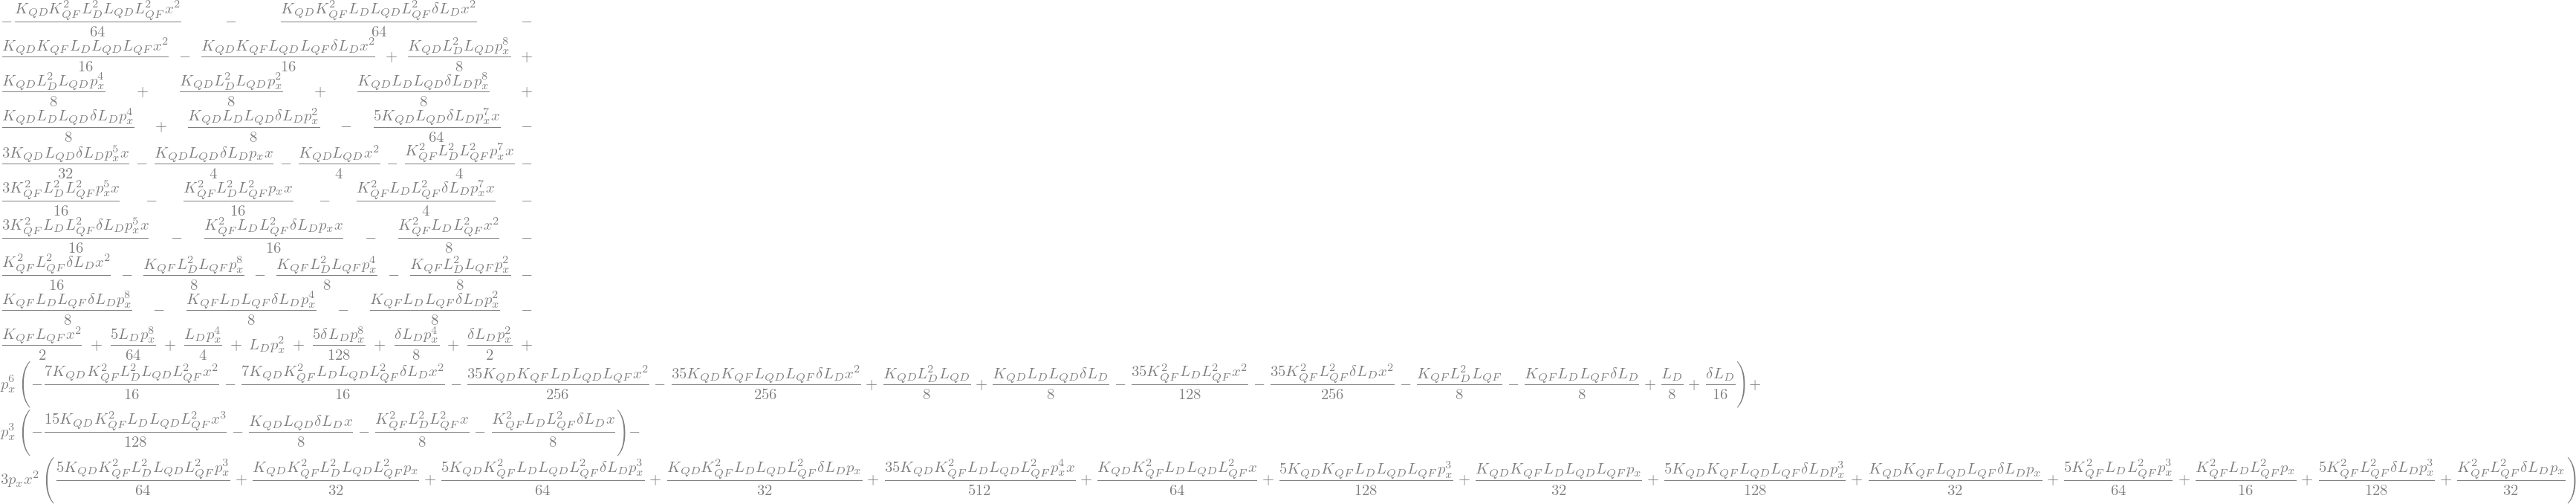

In [192]:
Hring.subs([(py,0),(y,0),(delta,0)]).collect(px**3).collect(-3*px*x**2)

Question can the ratio of the coefficients of $p_x^3$ and $-3x^2p_x$ in the expression above be made to be $1$. If yes then there is a resonance term and a possibility for islands.

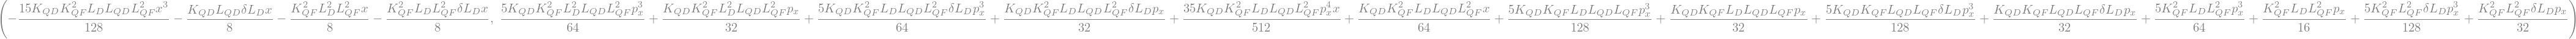

In [193]:
px3coeff = Hring.subs([(py,0),(y,0),(delta,0)]).collect(px**3).collect(-3*px*x**2).coeff(px**3)
m3x2pxcoeff = Hring.subs([(py,0),(y,0),(delta,0)]).collect(px**3).collect(-3*px*x**2).coeff(-3*px*x**2)
px3coeff,m3x2pxcoeff

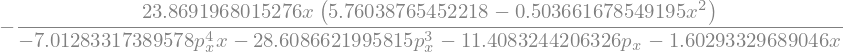

In [194]:
rep = list(zip(
    [
        LD,
        LD2,
        LQF,
        LQD,
        KQF,
        KQD,
        delta,
        dld
    ],
    [
        3.5805,
        3.5805,
        0.342,
        0.668,
        0.49,
        -0.4999,
        1.5e-3,
        0
    ]
)
          )
e1 = simplify(px3coeff / m3x2pxcoeff).subs(rep)
e1

<IPython.core.display.Javascript object>


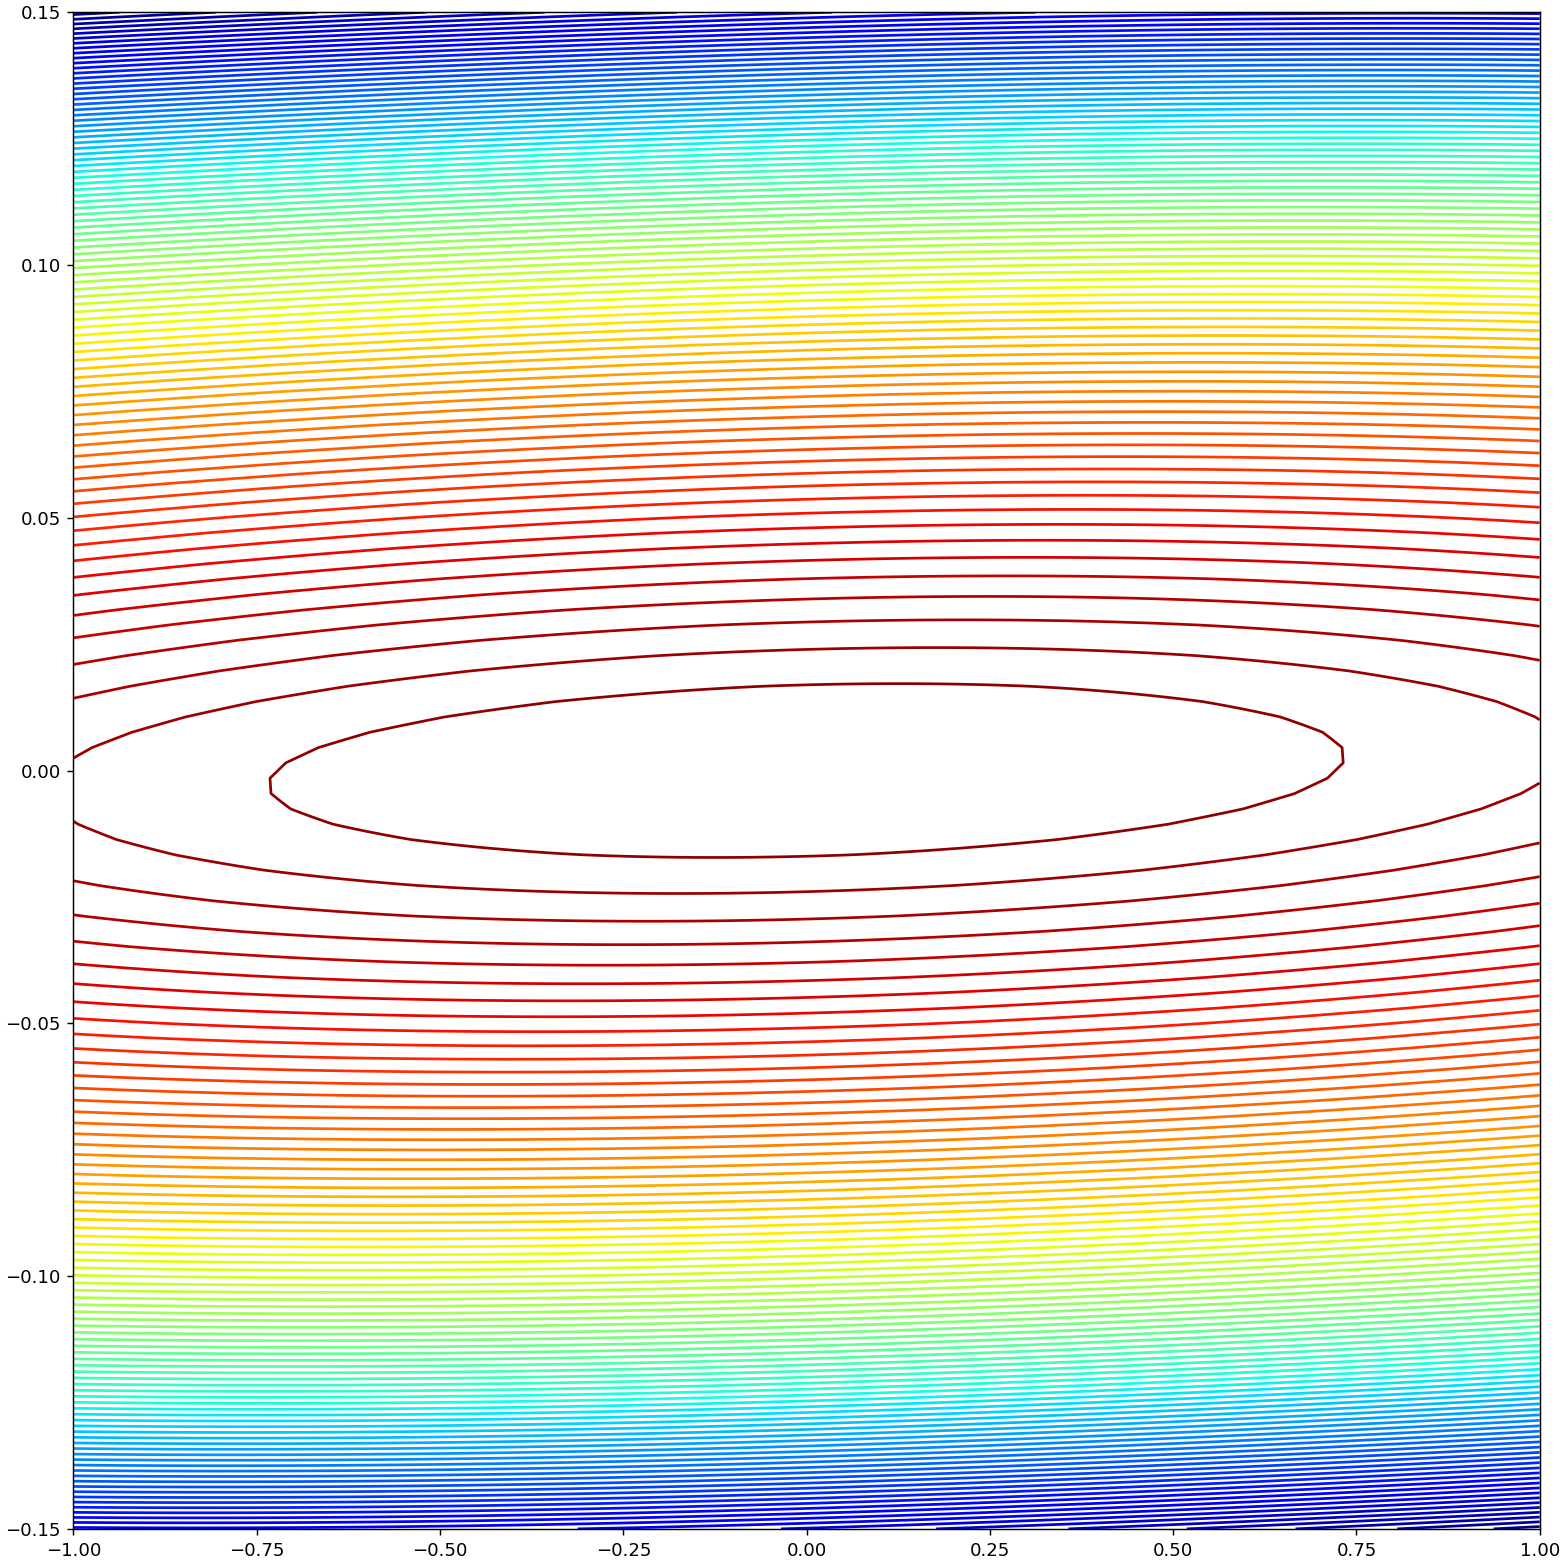

In [157]:
# fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')
ham1 = lambdify((x,px),Hring.subs([(py,0),(y,0),(delta,0)]).subs(rep),'numpy')
# fodoham2num = lambdify((x,px),fodoham2.subs(py,0).subs(y,0).subs(rep),'numpy')

multi_countour_plot(
    [ham1], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=1,
    prange=.15,
    nlevels=100
#     d3=True
)

In [ ]:
# fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')
eq1 = lambdify((x,px),e1,'numpy')
# fodoham2num = lambdify((x,px),fodoham2.subs(py,0).subs(y,0).subs(rep),'numpy')

multi_countour_plot(
    [eq1], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=10,
    prange=.8,
#      d3=True
)

In [203]:
solve(e1-1.,x,px)

KeyboardInterrupt: 

In [112]:
px3coeff.subs(rep).subs([(px,0.1),(x,0.1*0.0944643882550192)])

In [114]:
m3x2pxcoeff.subs(rep).subs([(px,0.1),(x,0.1*0.0944643882550192)])

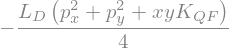

In [224]:
op1.ham

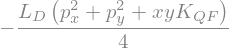

In [219]:
AssignHam(25,order=2,length=LD,k=KQF,flag=False)

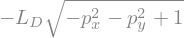

In [123]:
hamd1

In [ ]:
hamd1  =  HamDrift6D(beta0, gamma0, LD,x,px,y,py,delta).subs(beta0*gamma0,oo).subs(beta0,1).subs(delta,0)
hamd2  =  HamDrift6D(beta0, gamma0, LD2,x,px,y,py,delta).subs(beta0*gamma0,oo).subs(beta0,1).subs(delta,Zero())
hamqf = NegativeOne() * Rational(1,2) * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,0)
hamqf = hamqf.subs([(px,Zero()),(py,Zero())])
hamqd = NegativeOne() * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQD,x,px,y,py,delta,KQD).subs(delta,0)
hamqd = hamqd.subs([(px,Zero()),(py,Zero())])

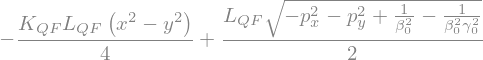

In [130]:
 NegativeOne() * Rational(1,2) * HamQuad6D(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,0)

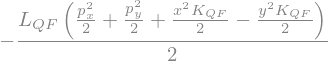

In [127]:
NegativeOne() * Rational(1,2) * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,0)

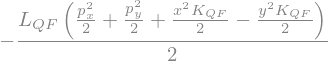

In [127]:
NegativeOne() * Rational(1,2) * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,0)

# Elegant Tracking

In [13]:
from pyelegant.ElegantRun import ElegantRun
from pyelegant.SDDSTools.SDDS import SDDS, SDDSCommand
from pyelegant.SDDSTools.Utils import GenerateNDimCoordinateGrid

In [115]:
sif = "/home/mti/gitlab-hzb/containers/bin/pelegant.sif"

In [33]:
dict(rep)


In [34]:
dict(rep)[LQF]

In [116]:
elements ={
    "QF":{
        "type" : "KQUAD",
        "L": dict(rep)[LQF],
        "K1": dict(rep)[KQF],
        "N_KICKS":16
    },
    "QD":{
        "type" : "KQUAD",
        "L": dict(rep)[LQD],
        "K1": dict(rep)[KQD],
        "N_KICKS":16
    },
    "D1":{
        "type" : "DRIF",
     "L":dict(rep)[LD]   
    },
    "D2":{
        "type" : "DRIF",
     "L":dict(rep)[LD2]   
    },
    "W1": {
        "type": "WATCH",
        "filename":"\"%s-%03ld.w1\"",
        "mode": "coordinates"
    }
}

FODOstr = "! FODO cell used by Jernej Frank for studying TRIBs\n\n"
stringlist = ["{:6}: {}".format(k,", ".join(["{}={:15.12f}".format(kk,vv) 
                                             if not isinstance(vv,str)
                                             else "{}={}".format(kk,vv)
                                             if kk!="type" else "{}".format(vv) for kk,vv in v.items()])) 
              for k,v in elements.items()]
line = ["W1","QF","D1","QD","D2","QF"]
linestr = "{:6}: LINE=({})".format("FODO",",".join(line))
FODOstr += "\n".join(stringlist)
FODOstr += "\n\n"
FODOstr += linestr

with open("FODO.lte","w") as f:
    f.write(FODOstr)
    
lattice = "FODO.lte"

In [117]:
# setup elegant simulator
er = ElegantRun(sif,lattice, parallel=True, use_beamline="FODO", energy=1700.00)

In [118]:
twidata, twipar = er.findtwiss()

In [153]:
deltanum = 1.5e-3 * twipar.pCentral

man_ranges_px0 = {
    0 : np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,1.975,1.9875,2,2.1,2.2,2.3]),
    1 : [0.05], #0.05
    2 : 0,
    3 : 0,
    4 : 0,
    5 : twipar.pCentral + deltanum 
}

man_ranges_px0p05 = {
    0 : np.array([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.95,1.975,1.9875,2,2.1,2.2,2.3]),
    1 : [0.05], #0.05
    2 : 0,
    3 : 0,
    4 : 0,
    5 : twipar.pCentral + deltanum
}

man_ranges_lim = {
    0 : np.array([1.7,1.8,1.9,1.95,1.975,1.9875]),
    1 : [0.05], #0.05
    2 : 0,
    3 : 0,
    4 : 0,
    5 : twipar.pCentral + deltanum
}

In [154]:
er.generate_sdds_particle_inputfile(man_ranges=man_ranges_px0)
er.track_simple(n_passes=2500)

Shape: (24, 6) - Number of paritcles: 24 
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif plaindata2sdds temp_plain_particles.dat temp_particles_input.bin -inputMode=ascii -outputMode=binary "-separator=  " -column=x,double,units=m -column=xp,double -column=y,double,units=m -column=yp,double -column=t,double,units=s -column=p,double,units="m$be$nc" -columns=particleID,long -noRowCount
bash run_pelegant.sh
bash run_pelegant.sh temp.ele


In [56]:
# if you want to check input 
# parallel elegant
sddsinput = SDDS(sif, "temp_particles_input.bin",0)
# serial 
# sddsinput = SDDS(sif, "temp_particles_input.txt",1)
sddsinput.getColumnValues()

x   xp    y   yp    t            p  particleID
0   0.000000  0.0  0.0  0.0  0.0  3331.806224           1
1   0.000001  0.0  0.0  0.0  0.0  3331.806224           2
2   0.000010  0.0  0.0  0.0  0.0  3331.806224           3
3   0.000100  0.0  0.0  0.0  0.0  3331.806224           4
4   0.001000  0.0  0.0  0.0  0.0  3331.806224           5
5   0.010000  0.0  0.0  0.0  0.0  3331.806224           6
6   0.100000  0.0  0.0  0.0  0.0  3331.806224           7
7   1.000000  0.0  0.0  0.0  0.0  3331.806224           8
8   1.100000  0.0  0.0  0.0  0.0  3331.806224           9
9   1.200000  0.0  0.0  0.0  0.0  3331.806224          10
10  1.300000  0.0  0.0  0.0  0.0  3331.806224          11
11  1.400000  0.0  0.0  0.0  0.0  3331.806224          12
12  1.500000  0.0  0.0  0.0  0.0  3331.806224          13
13  1.600000  0.0  0.0  0.0  0.0  3331.806224          14
14  1.700000  0.0  0.0  0.0  0.0  3331.806224          15
15  1.800000  0.0  0.0  0.0  0.0  3331.806224          16
16  1.900000  0.0  0.0  0.0  0.0  3331.806224          17
17  1.950000  0.0  0.0  0.0  0.0  3331.806224          18
18  1.975000  0.0  0.0  0.0  0.0  3331.806224          19
19  1.987500  0.0  0.0  0.0  0.0  3331.806224          20
20  2.000000  0.0  0.0  0.0  0.0  3331.806224          21
21  2.100000  0.0  0.0  0.0  0.0  3331.806224          22
22  2.200000  0.0  0.0  0.0  0.0  3331.806224          23
23  2.300000  0.0  0.0  0.0  0.0  3331.806224          24

In [155]:
sddsp = SDDS(sif,"temp-001.w1",0)

# saving plot to file
sddsp.sddsplot_base(
    columnNames="x,xp",
    file="temp-001.w1",
    scale="0,0,0,0",
    graph="symb,vary=subtype,fill",
    order="spectral",
    split="columnBin=particleID",
    device="gif",
    output="FODO_island_init_px_zero.gif"
)

# showing plot
sddsp.sddsplot_base(
    columnNames="x,xp",
    file="temp-001.w1",
    scale="0,0,0,0",
    graph="symb,vary=subtype,fill",
    order="spectral",
    split="columnBin=particleID"
)

Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=x,xp temp-001.w1 -scale=0,0,0,0 -graph=symb,vary=subtype,fill -order=spectral -split=columnBin=particleID -device=gif -output=FODO_island_init_px_zero.gif
Running command /home/mti/gitlab-hzb/containers/bin/pelegant.sif sddsplot -columnNames=x,xp temp-001.w1 -scale=0,0,0,0 -graph=symb,vary=subtype,fill -order=spectral -split=columnBin=particleID


<IPython.core.display.Javascript object>


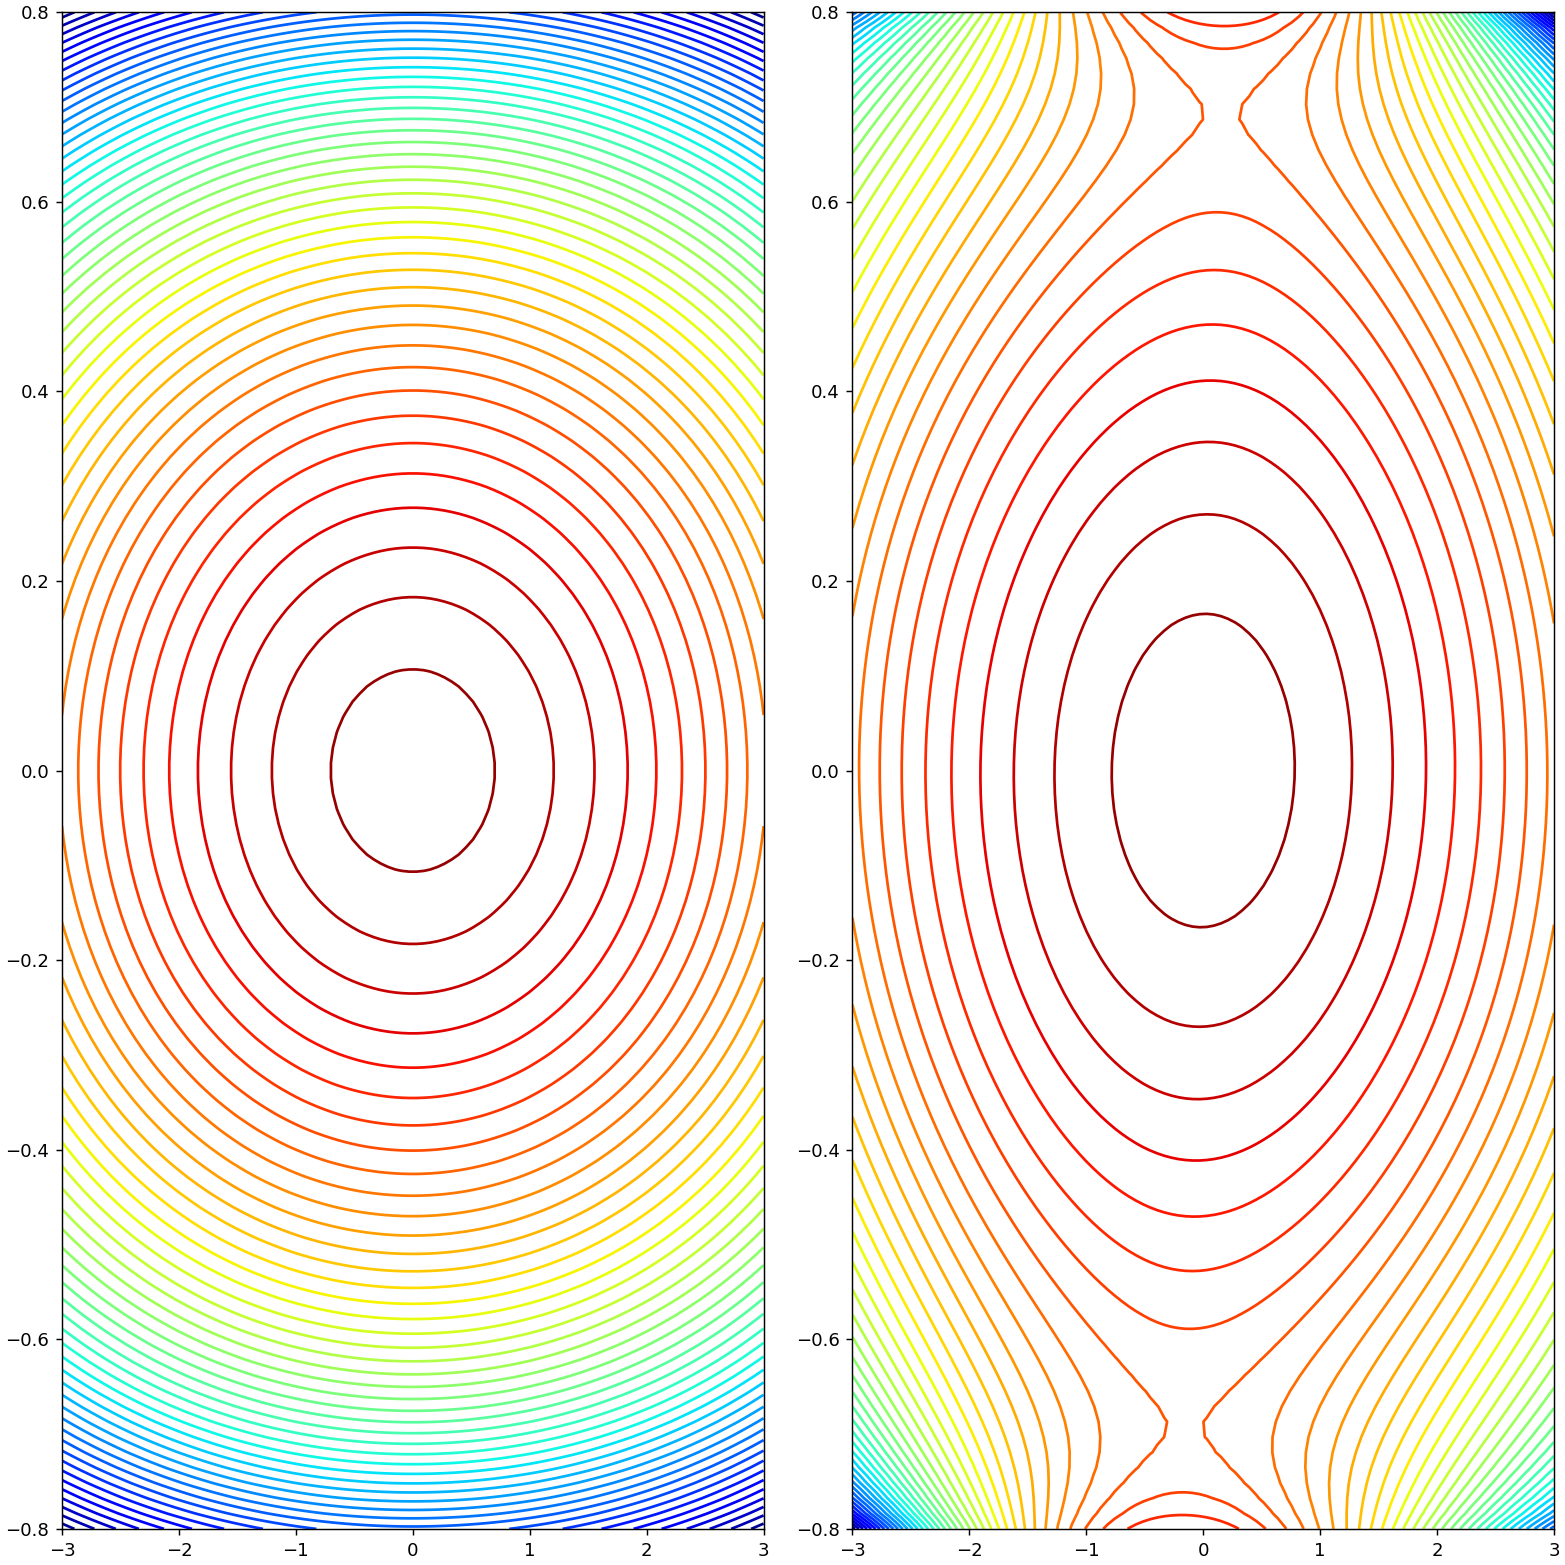

In [110]:
# fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')
fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')
fodoham2num = lambdify((x,px),fodoham2.subs(py,0).subs(y,0).subs(rep),'numpy')

multi_countour_plot(
    [fodoham1num, fodoham2num], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=3,
    prange=.8,
)

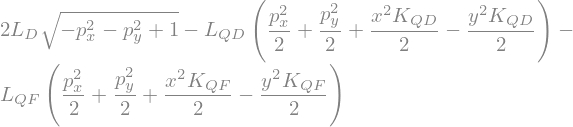

In [44]:
 ham1.subs(A,hamqf).subs(B,hamd).subs(C,hamqd).subs(D,hamd).subs(E,hamqf)

In [33]:
o = 3
ham1     = Aop.BCH(Bop,o).BCH(Cop,o).BCH(Dop,o).BCH(Eop,o).ham
fodoham1 = ham1.subs(A,hamqf).subs(B,hamd).subs(C,hamqd).subs(D,hamd).subs(E,hamqf).doit()

TypeError: 'float' object is not callable

In [108]:
fodoham1.free_symbols

In [115]:
fodoham1fdx = lambdify((x,px), diff(fodoham1.subs(py,0).subs(y,0).subs(rep),x),"numpy")
fodoham1fdpx = lambdify((x,px), diff(fodoham1.subs(py,0).subs(y,0).subs(rep),px),"numpy")

In [ ]:
nsolve(
    (diff(fodoham1.subs(py,0).subs(y,0).subs(rep),x),diff(fodoham1.subs(py,0).subs(y,0).subs(rep),px)),
    (x,px),
    (0.5,0.8)
)

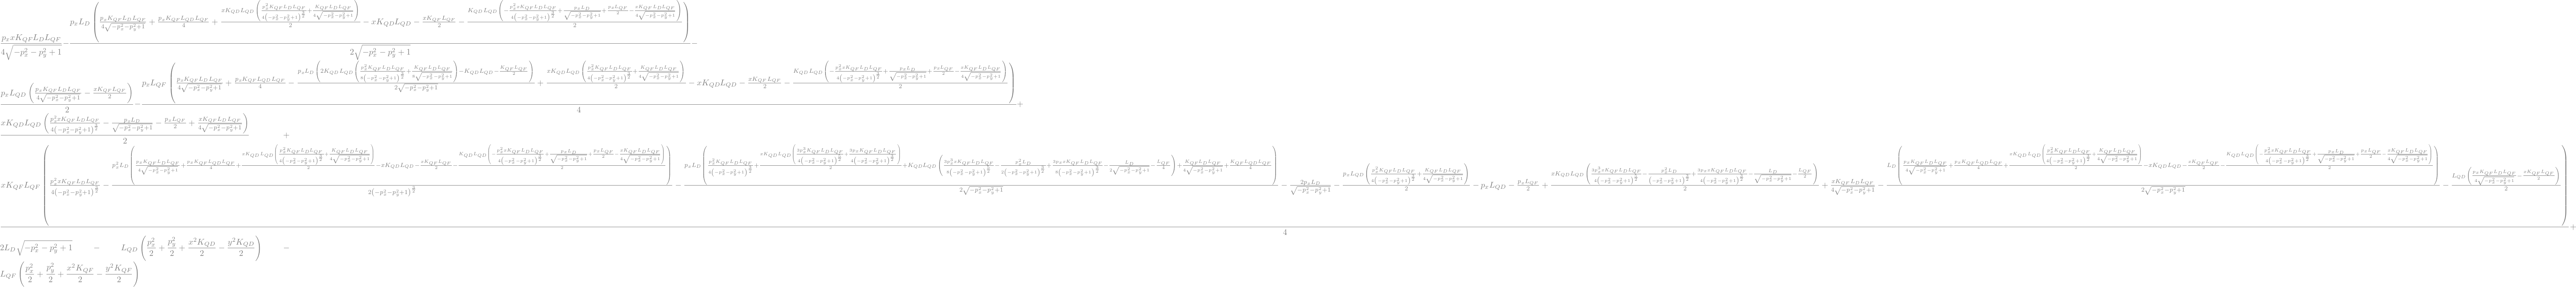

In [112]:
fodoham1

In [ ]:
fodoham1num = lambdify((x,px),fodoham1.subs(py,0).subs(y,0).subs(rep),'numpy')

multi_countour_plot(
    [fodoham1num], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=3,
    prange=.8,
)

In [54]:
from scipy.optimize import fsolve

fsolve(fodoham1fdx(x,px),(.2,.2))

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sqrt method

In [40]:
2*np.pi/3

<IPython.core.display.Javascript object>


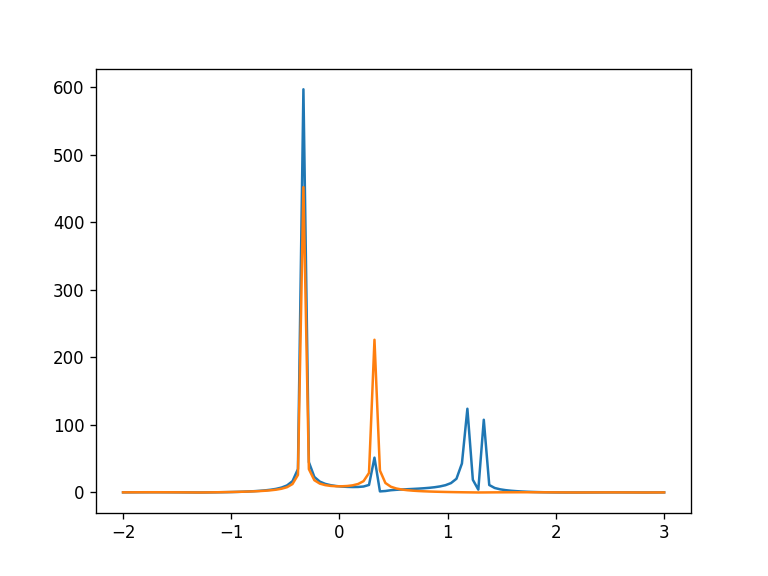

In [109]:
nu0 = 0.33
n = 4

s = .33
def res(j):
    return abs(np.cos(0.33**2-j**2)/(0.33**2-j**2))

def f(j):
    return res(j) * abs((1 + np.cos( (s+jupf1-j) * (s-jufp2+j) )  /  ((s+jupf1-j) * (s-jufp2+j) )))

# def f(j):
#     A = s -(jufp2-jupf1)*j
#     B = s +(jufp2-jupf1)*j
    
    
#     return res(j) * abs(1 + np.cos( A*B)  /  ( A*B))


XX = np.linspace(-2,3,100)
plt.plot(XX, f(XX))
plt.plot(XX, res(XX))

In [13]:
fixedpoints2D(fodoham1,x,px)

TypeError: 'float' object is not callable

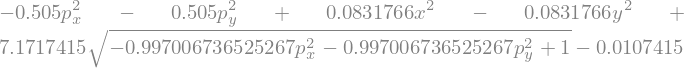

In [19]:
fodoham1num = fodoham1.subs(rep)
fodoham1num

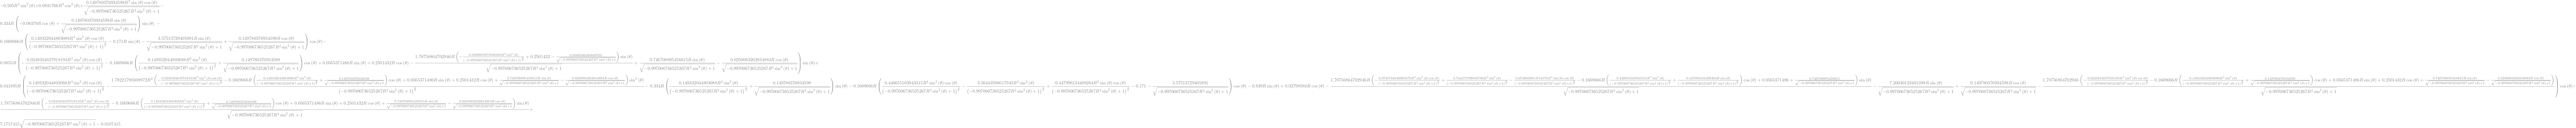

In [43]:
R, theta = symbols("R theta", real=True, positive=True)

xpolar = list(
    zip(
        [x, px, y, py, delta],
        [R*cos(theta),R*sin(theta),0,0,0]
    )
)
xpolarfodoham1 = fodoham1num.subs(xpolar)
xpolarfodoham1

In [45]:
simplify(xpolarfodoham1.subs(theta,3*np.pi/4) - xpolarfodoham1.subs(theta,np.pi/4))

KeyboardInterrupt: 

In [44]:
solve(simplify(xpolarfodoham1.subs(theta,3*np.pi/4) - xpolarfodoham1.subs(theta,np.pi/4)))

KeyboardInterrupt: 

In [29]:
from scipy.optimize import fsolve

In [33]:
simplify(xpolarfodoham1.subs(theta,np.pi/4) - xpolarfodoham1.subs(theta,0))

In [30]:
fsolve(,1)

TypeError: 'Add' object is not callable

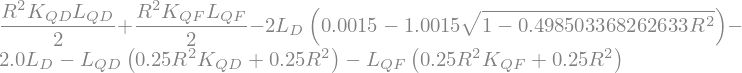

In [48]:
fodoham1.subs(rep).subs(xpolar).subs(theta,np.pi/4) - fodoham1.subs(rep).subs(xpolar).subs(theta,0)

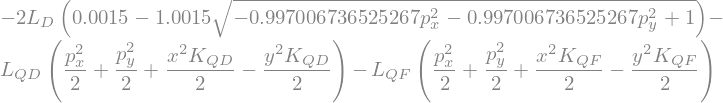

In [49]:
fodoham1.subs(rep)

<IPython.core.display.Javascript object>


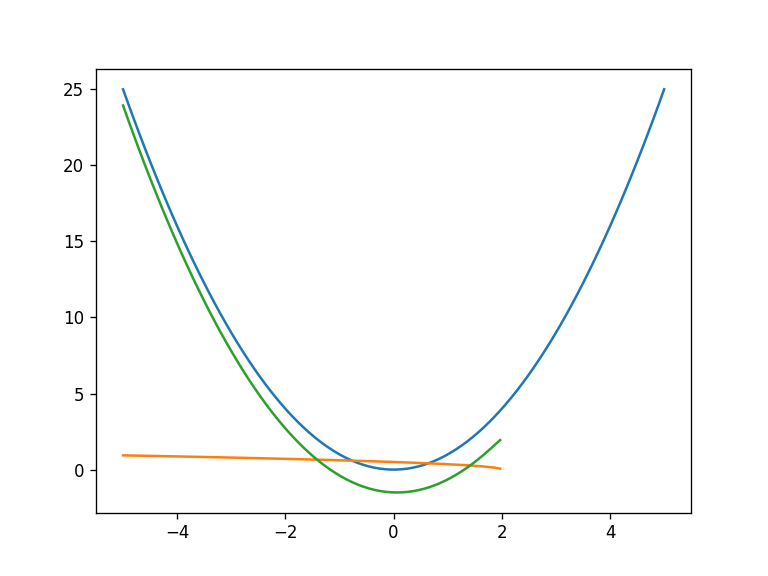

/home/mti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mti/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [40]:
XX = np.linspace(-5,5,100)
plt.plot(XX,XX**2)
plt.plot(XX, .5*np.sqrt(1-0.5*XX))
plt.plot(XX,XX**2+.5*np.sqrt(1-0.5*XX)-2)
